## Setup

In [1]:
import pandas

data = pandas.read_csv("./glass.data")

data

,ID,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
data.describe()

,ID,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Separate the Xs and Y.

In [3]:
Y = data["Type"]
Xs = data.loc[:, ["Refractive Index","Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]]
Xs

,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [4]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

Looking at features' information gain.

In [5]:
from sklearn.feature_selection import mutual_info_classif
dict(zip(Xs.head(), mutual_info_classif(Xs, Y)))


{'Refractive Index': 0.3513220793898131,
 'Na': 0.29728248383860434,
 'Mg': 0.44094758209738494,
 'Al': 0.3959147903441709,
 'Si': 0.07533181329308913,
 'K': 0.30785451991458856,
 'Ca': 0.2488058621954714,
 'Ba': 0.258837123042599,
 'Fe': 0.11314829354727918}

Oh wow. Drop those two with 0.07 information gain.

In [6]:
from sklearn.feature_selection import SelectKBest
X_new = SelectKBest(mutual_info_classif, k=7).fit_transform(Xs, Y)
X_new

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.06   ,  8.75   ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.48   ,  7.83   ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.39   ,  7.78   ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  0.     ,  8.44   ,  1.64   ],
       [ 1.51651, 14.38   ,  0.     , ...,  0.     ,  8.48   ,  1.57   ],
       [ 1.51711, 14.23   ,  0.     , ...,  0.     ,  8.62   ,  1.67   ]])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_new, Y, test_size=0.25, random_state=42
)

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [9]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.19547271, -0.38549943,  0.50954892, ...,  0.16161629,
        -0.30659839, -0.34520946],
       [-0.35305687, -0.46248704,  0.54545477, ...,  0.05706667,
        -0.3413011 , -0.34520946],
       [-2.29552293,  0.39720796,  0.30129498, ...,  2.18290894,
        -2.43040389,  1.90266608],
       ...,
       [-0.82580937, -0.33417436,  0.45209956, ..., -0.76190535,
        -0.3760038 , -0.34520946],
       [ 0.02321552,  0.91045871, -0.42400323, ..., -0.88387991,
         0.2694665 , -0.34520946],
       [-0.07969658, -0.97573779, -0.01467652, ..., -0.27400713,
         0.33887191, -0.34520946]])

In [10]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-2.88736806e-01, -4.88149581e-01,  5.88541792e-01,
        -1.58931266e-01,  1.09341477e-01, -3.69063259e-01,
        -3.45209458e-01],
       [-3.78784901e-01,  1.69316611e+00, -1.99667953e+00,
         1.91087127e+00, -8.83879910e-01,  1.26664870e-02,
         9.01511431e-01],
       [ 9.88016546e-01, -4.23993237e-01,  6.24447644e-01,
        -1.19383253e+00, -5.52806115e-01,  6.37315163e-01,
        -3.45209458e-01],
       [-7.80785327e-01,  1.88563514e+00, -1.99667953e+00,
         1.99535301e+00, -8.83879910e-01, -1.19203789e-01,
         8.63732010e-01],
       [-4.39888966e-01,  4.35701770e-01,  6.45991155e-01,
         7.91488265e-01,  2.31316034e-01, -7.29971383e-01,
        -3.45209458e-01],
       [ 2.87581055e+00, -3.02874079e+00, -1.99667953e+00,
        -1.44727774e+00, -8.83879910e-01,  4.18393153e+00,
        -3.45209458e-01],
       [-2.69440785e-01, -7.31943687e-01,  5.45454770e-01,
        -4.33496909e-01,  1.26766414e-01, -3.76003800e-01,
        -3.4520945

In [11]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(X_train_scaled, Y_train)

In [12]:
logistic.score(X_test_scaled, Y_test)

0.6851851851851852

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_5_unweighted = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, Y_train)

In [14]:
knn_5_unweighted.score(X_test_scaled, Y_test)

0.7037037037037037

In [15]:
knn_5_weighted = KNeighborsClassifier(n_neighbors=5, weights="distance").fit(X_test_scaled, Y_test)

In [16]:
knn_5_weighted.score(X_test_scaled, Y_test)

1.0

In [17]:
from sklearn.svm import SVC

support = SVC().fit(X_test_scaled, Y_test)

In [18]:
support.score(X_test_scaled, Y_test)

0.7222222222222222

## Thoroughly testing all algorithms with tweaks

First, a helper function to get us a statistically significant number of results.

In [19]:
import random
import time
import numpy
random.seed(time.time())

def thorough_test(classifier):
    results = numpy.zeros(30)
    for i in range(0, 30):
        X_train, X_test, Y_train, Y_test = train_test_split(
            Xs, Y, test_size=0.10, random_state=random.randint(0, 1000 * i)
        )
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        classifier.fit(X_train_scaled, Y_train)
        results[i] = classifier.score(X_test_scaled, Y_test)
    return results

thorough_test(LogisticRegression()).mean()

0.6484848484848486

Another helper function to run one round of tests, but collecting metrics data too.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

def metrics_test(classifier):
    X_train, X_test, Y_train, Y_test = train_test_split(
        Xs, Y, test_size = 0.25, random_state = random.randint(0, 1000)
    )
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    classifier.fit(X_train_scaled, Y_train)
    Y_pred = classifier.predict(X_test_scaled)
    
    return {
        "accuracy": accuracy_score(Y_test, Y_pred),
        "precision": precision_score(Y_test, Y_pred, average='weighted'),
        "f1": f1_score(Y_test, Y_pred, average='weighted'),
        "recall": recall_score(Y_test, Y_pred, average='weighted'),
        "confusion matrix": confusion_matrix(Y_test, Y_pred)
    }

metrics_for_testing = metrics_test(LogisticRegression())
metrics_for_testing

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.6111111111111112,
 'precision': 0.6029741863075196,
 'f1': 0.5981182795698925,
 'recall': 0.6111111111111112,
 'confusion matrix': array([[ 9,  4,  0,  0,  0,  0],
        [ 7, 15,  0,  2,  2,  0],
        [ 2,  2,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  1],
        [ 0,  0,  0,  0,  1,  0],
        [ 0,  1,  0,  0,  0,  8]], dtype=int64)}

First round of tests, on logistic regressors.

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C': [0.5, 0.7, 1.0, 1.5, 2, 5, 10, 100],
        'solver': ["lbfgs"],
        'penalty': ["none", "l2"]
    },
    {
        'C': [0.5, 0.7, 1.0, 1.5, 2, 5, 10, 100],
        'solver': ["liblinear"],
        'penalty': ["l1", "l2"]
    },
    {
        'C': [0.5, 0.7, 1.0, 1.5, 2, 5, 10, 100],
        'solver': ["newtoncg"],
        'penalty': ["none", "l2"]
    }
]
gridsearch = GridSearchCV(LogisticRegression(), param_grid)
gridsearch.fit(X_train_scaled, Y_train)
(gridsearch.best_params_, gridsearch.best_score_)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

({'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}, 0.60625)

In [22]:
logistic = LogisticRegression(C = 0.5, penalty='l1', solver='liblinear')
logistic_results = thorough_test(logistic)
logistic_metrics = metrics_test(logistic)
logistic_results

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.40909091, 0.5       , 0.59090909, 0.54545455, 0.59090909,
       0.45454545, 0.5       , 0.59090909, 0.5       , 0.54545455,
       0.63636364, 0.54545455, 0.54545455, 0.68181818, 0.36363636,
       0.54545455, 0.63636364, 0.63636364, 0.72727273, 0.40909091,
       0.36363636, 0.5       , 0.5       , 0.72727273, 0.68181818,
       0.68181818, 0.68181818, 0.63636364, 0.72727273, 0.59090909])

Next round will be on K-Neighbors classifiers.

In [23]:
neighbors = KNeighborsClassifier()
param_grid = [
    {
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
        'n_neighbors': range(1, 16),
        'weights': ['uniform', 'distance']
    }
]
gridsearch = GridSearchCV(neighbors, param_grid)
gridsearch.fit(X_train_scaled, Y_train)
(gridsearch.best_params_, gridsearch.best_score_)

({'algorithm': 'ball_tree',
  'metric': 'manhattan',
  'n_neighbors': 3,
  'weights': 'distance'},
 0.75)

In [24]:
neighbors = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', metric='manhattan', weights='distance')
neighbors_results = thorough_test(neighbors)
neighbors_metrics = metrics_test(neighbors)
neighbors_results

array([0.63636364, 0.72727273, 0.81818182, 0.77272727, 0.68181818,
       0.86363636, 0.72727273, 0.86363636, 0.54545455, 0.63636364,
       0.63636364, 0.77272727, 0.72727273, 0.63636364, 0.90909091,
       0.86363636, 0.81818182, 0.72727273, 0.68181818, 0.77272727,
       0.72727273, 0.72727273, 0.81818182, 0.77272727, 0.68181818,
       0.86363636, 0.72727273, 0.77272727, 0.72727273, 0.86363636])

Finally, we test support vector machines.

In [25]:
svc = SVC()
param_grid = [
    {
        'C': [0.5, 0.7, 1.0, 1.5, 2, 5, 10, 100],
        'decision_function_shape': ['ovo', 'ovr'],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'shrinking': [True, False]
    }
]
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(X_train_scaled, Y_train)
(gridsearch.best_params_, gridsearch.best_score_)

({'C': 1.5,
  'decision_function_shape': 'ovo',
  'gamma': 'auto',
  'kernel': 'rbf',
  'shrinking': True},
 0.7)

In [26]:
svc = SVC(C = 1.5, decision_function_shape='ovo', gamma='auto', kernel='rbf', shrinking=True)
svc_results = thorough_test(svc)
svc_metrics = metrics_test(svc)
svc_results

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.59090909, 0.72727273, 0.72727273, 0.45454545, 0.81818182,
       0.68181818, 0.68181818, 0.72727273, 0.72727273, 0.86363636,
       0.72727273, 0.5       , 0.63636364, 0.77272727, 0.72727273,
       0.68181818, 0.77272727, 0.81818182, 0.86363636, 0.59090909,
       0.59090909, 0.63636364, 0.63636364, 0.5       , 0.77272727,
       0.45454545, 0.63636364, 0.63636364, 0.68181818, 0.68181818])

## K-Fold cross validation

Run the same tests, but with K-Fold instead of train-test splits.

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(SelectKBest(mutual_info_classif, k=7), preprocessing.StandardScaler())

def test_kfold(classifier):
    pipeline.steps.append(['classifier', classifier])
    results = cross_val_score(pipeline, Xs, Y, cv=5)
    pipeline.steps.pop()
    return results

test_kfold(LogisticRegression())

array([0.51162791, 0.72093023, 0.46511628, 0.60465116, 0.5952381 ])

In [28]:
logistic_kfold = test_kfold(logistic)
neighbors_kfold = test_kfold(neighbors)
svc_kfold = test_kfold(svc)

## Plot em up

### All classifiers

#### Score

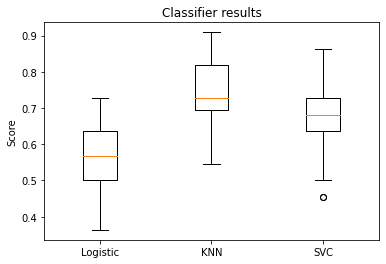

In [29]:
import matplotlib.pyplot as pyplot

pyplot.boxplot([logistic_results, neighbors_results, svc_results],
    labels = ["Logistic", "KNN", "SVC"]
)
pyplot.ylabel("Score")
pyplot.title("Classifier results")
pyplot.show()

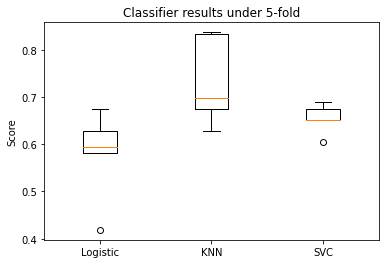

In [30]:
pyplot.boxplot([logistic_kfold, neighbors_kfold, svc_kfold],
    labels = ["Logistic", "KNN", "SVC"]
)
pyplot.ylabel("Score")
pyplot.title("Classifier results under 5-fold")
pyplot.show()

#### Accuracy

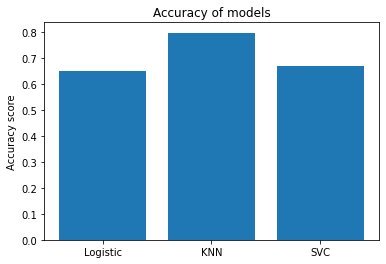

In [31]:
accuracies = [logistic_metrics["accuracy"], neighbors_metrics["accuracy"], svc_metrics["accuracy"]]
pyplot.bar(["Logistic", "KNN", "SVC"], accuracies)
pyplot.ylabel("Accuracy score")
pyplot.title("Accuracy of models")
pyplot.show()

#### Precision

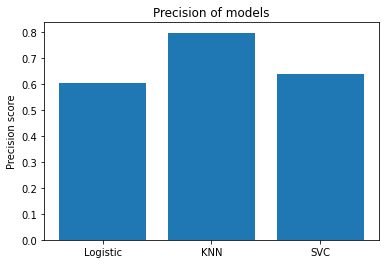

In [32]:
precisions = [logistic_metrics["precision"], neighbors_metrics["precision"], svc_metrics["precision"]]
pyplot.bar(["Logistic", "KNN", "SVC"], precisions)
pyplot.ylabel("Precision score")
pyplot.title("Precision of models")
pyplot.show()

#### F1 score

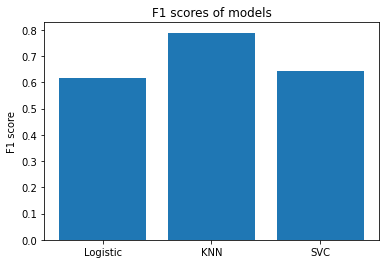

In [33]:
f1s = [logistic_metrics["f1"], neighbors_metrics["f1"], svc_metrics["f1"]]
pyplot.bar(["Logistic", "KNN", "SVC"], f1s)
pyplot.ylabel("F1 score")
pyplot.title("F1 scores of models")
pyplot.show()

#### Recall

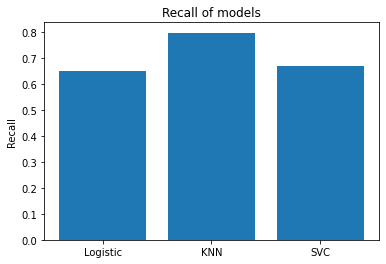

In [34]:
recalls = [logistic_metrics["recall"], neighbors_metrics["recall"], svc_metrics["recall"]]
pyplot.bar(["Logistic", "KNN", "SVC"], recalls)
pyplot.ylabel("Recall")
pyplot.title("Recall of models")
pyplot.show()

### Confusion matrices

#### Logistic regression

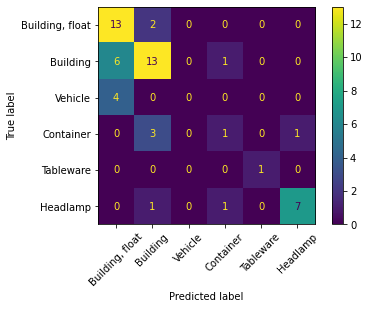

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=logistic_metrics["confusion matrix"], 
    display_labels=[
        "Building, float", 
        "Building",
        "Vehicle",
        "Container",
        "Tableware",
        "Headlamp"
    ]
)
disp.plot()

pyplot.xticks(rotation = 45)
pyplot.show()

#### Neighbors

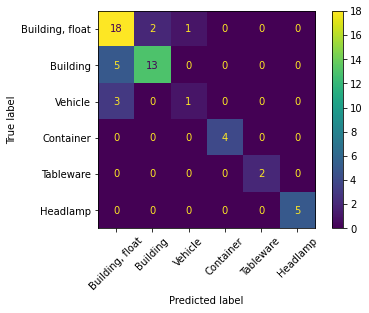

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=neighbors_metrics["confusion matrix"], 
    display_labels=[
        "Building, float", 
        "Building",
        "Vehicle",
        "Container",
        "Tableware",
        "Headlamp"
    ]
)
disp.plot()

pyplot.xticks(rotation = 45)
pyplot.show()

#### SVC

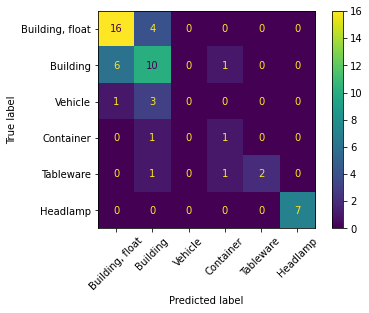

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=svc_metrics["confusion matrix"], 
    display_labels=[
        "Building, float", 
        "Building",
        "Vehicle",
        "Container",
        "Tableware",
        "Headlamp"
    ]
)
disp.plot()

pyplot.xticks(rotation = 45)
pyplot.show()